### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes =True)
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [32]:
rating = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [33]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [34]:
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [35]:
rating.shape

(100000, 4)

In [36]:
rating.isnull().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

#### There are no missing values in the rating data

In [37]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [38]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [39]:
movie.shape

(1681, 22)

In [40]:
movie.isnull().any()

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

#### There are no null values in movie/item data

In [41]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [42]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [43]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [44]:
user.shape

(943, 5)

In [45]:
user.isnull().any()

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

#### There are no null values in the user data 

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [46]:
movie.iloc[:, 3:].sum().sort_values(ascending = False)

Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64

In [47]:
movie.loc[:, 'Action': 'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [48]:
movie[movie['unknown'] ==1].head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
movie_drop = movie.drop(1371)

In [50]:
movie_drop.iloc[:, 3:].sum()

unknown          0
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [51]:
movie_drop['number of genres'] = movie_drop.sum(axis=1) - movie_drop['movie id']

In [26]:
movie_drop [['movie title', 'number of genres']] [movie_drop['number of genres'] > 1]

,movie title,number of genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [ ]:
movie_drop [['movie title', 'number of genres']] [movie_drop['number of genres'] > 1].sort

In [412]:
movie_drop [movie_drop['number of genres'] > 1].shape[0]

849

#### The total number of movies having more than one genre : 849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [413]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


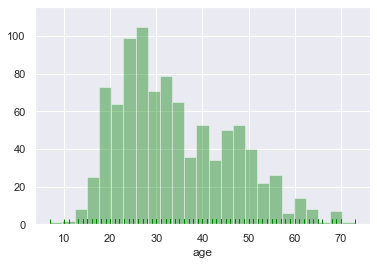

In [414]:
sns.distplot(user['age'], kde=0,rug=True, color = 'green', bins = 25) ;

In [54]:
movie_drop ['release year'] = movie_drop['release date'].apply(lambda x: x.split('-')[2])

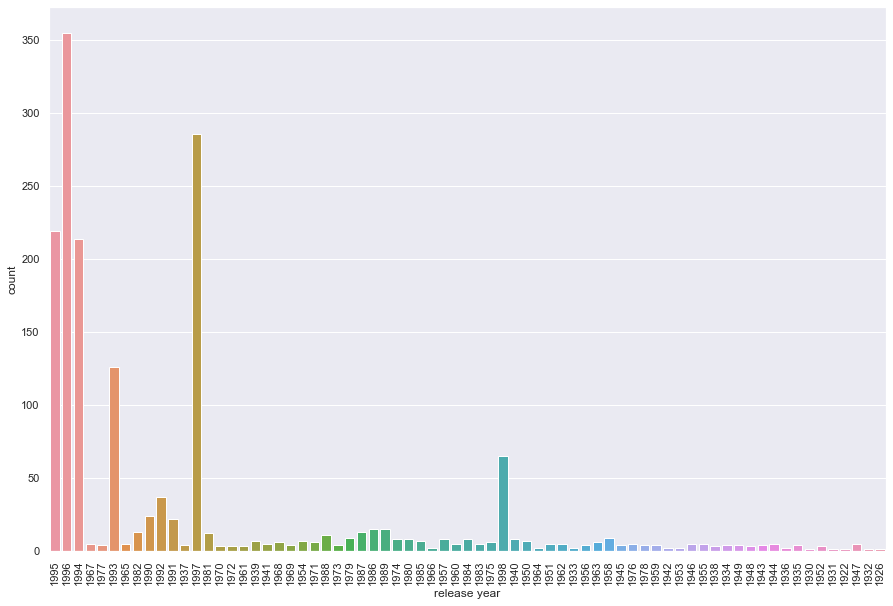

In [416]:
plt.figure(figsize=(15,10))
chart2 = sns.countplot(movie_drop['release year'] )
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90);

In [417]:
perc_rating = pd.DataFrame ((rating['rating'].value_counts()/rating['rating'].count())*100)
perc_rating_reset = perc_rating.reset_index()

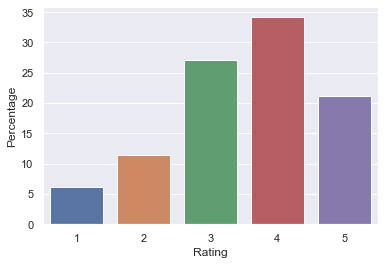

In [418]:
chart3 = sns.barplot(x = perc_rating_reset['index'] , y = perc_rating_reset['rating']);
chart3.set(xlabel="Rating", ylabel = "Percentage");

In [58]:
x = pd.DataFrame (rating['rating'].value_counts(normalize = True) * 100)
x

,rating
4,34.174
3,27.145
5,21.201
2,11.370
1,6.110


In [419]:
perc_gender = (user['gender'].value_counts()/user['gender'].count())*100
perc_gender_reset = perc_gender.reset_index()

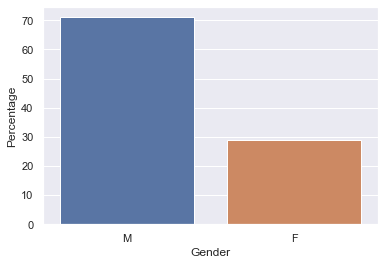

In [420]:
chart4 = sns.barplot(x = perc_gender_reset['index'] , y = perc_gender_reset['gender']);
chart4.set(xlabel="Gender", ylabel = "Percentage");

In [421]:
perc_occupation = (user['occupation'].value_counts() / user['occupation'].count())*100
perc_occupation_reset = perc_occupation.reset_index()

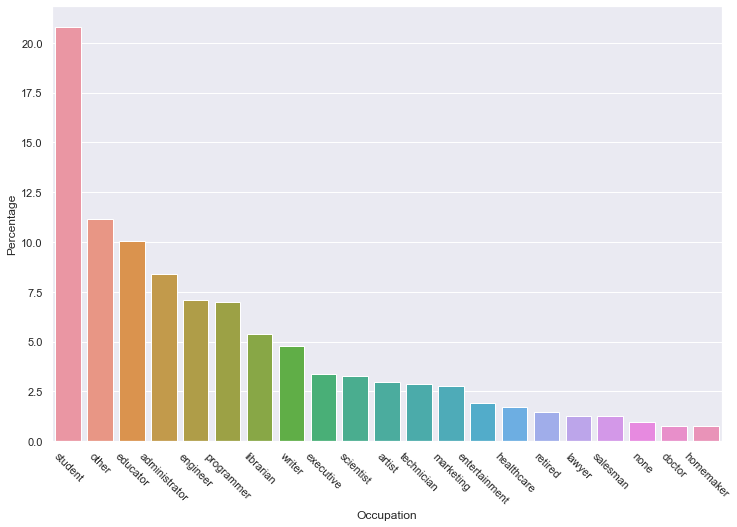

In [422]:
plt.figure(figsize=(12,8))
chart5 = sns.barplot(x = perc_occupation_reset['index'] , y = perc_occupation_reset['occupation']);
chart5.set(xlabel="Occupation", ylabel = "Percentage");
chart5.set_xticklabels(chart5.get_xticklabels(), rotation=-45);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [423]:
df = movie_drop.iloc[:, 4:]
df2 = df.set_index('release year')
df3 = df2.drop('number of genres', axis =1)

In [425]:
df4 = df3.groupby('release year')[df3.columns].sum()
df4['total'] = df4.sum(axis=1)
df5 = (df4.div(df4['total'], axis= 0) * 100)

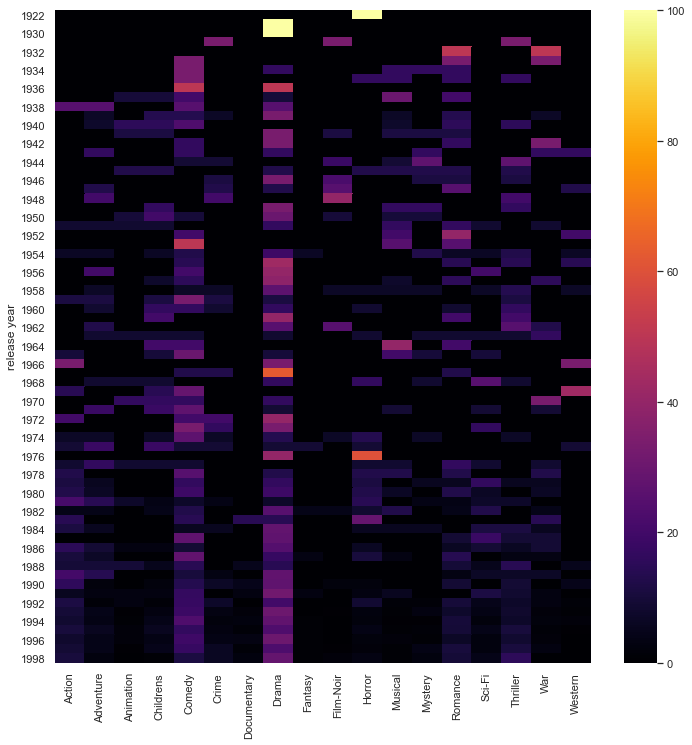

In [434]:
plt.figure(figsize=(12,12))
sns.heatmap(df5.drop('total', axis =1), cmap = 'inferno');

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [427]:
avg_rating =  pd.DataFrame (rating.groupby('movie id')['rating'].sum() / rating.groupby('movie id')['rating'].count())
avg_rating [ 'number of ratings'] = rating.groupby('movie id')['rating'].count()
avg_rating = avg_rating.rename(columns={'rating':'avg_rating'})
HundredPlusRatings = avg_rating[avg_rating['number of ratings'] > 100]
HundredPlusRatings

,avg_rating,number of ratings
movie id,,
1,3.878319,452
2,3.206107,131
4,3.550239,209
7,3.798469,392
8,3.995434,219
...,...,...
926,2.702970,101
928,3.115385,104
1016,3.459854,137


In [428]:
movie_names = movie[['movie id','movie title']] 
highest_rating = HundredPlusRatings.sort_values(by = ['avg_rating'], ascending = False )
pd.merge (highest_rating, movie_names, how='inner',on='movie id').head(25)

,movie id,avg_rating,number of ratings,movie title
0,408,4.491071,112,"Close Shave, A"
1,318,4.466443,298,Schindler's List
2,169,4.466102,118,"Wrong Trousers, The"
3,483,4.456790,243,Casablanca
4,64,4.445230,283,"Shawshank Redemption, The"
5,603,4.387560,209,Rear Window
6,12,4.385768,267,"Usual Suspects, The"
7,50,4.358491,583,Star Wars
8,178,4.344000,125,12 Angry Men
9,134,4.292929,198,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [429]:
merge1 = pd.merge (rating, movie_drop, how='outer',on='movie id')
merge2 = pd.merge (merge1, user, how='outer', on='user id')

In [430]:
gender_drama = pd.DataFrame (merge2.groupby('gender')['Drama'].sum())
gender_drama['percentages'] =  (gender_drama.div(gender_drama['Drama'].sum(), axis = 0) * 100)
gender_drama

,Drama,percentages
gender,,
F,11008.0,27.59243
M,28887.0,72.40757


#### Yes, men does watch more drama than women

In [431]:
gender_sci_fi = pd.DataFrame (merge2.groupby('gender')['Sci-Fi'].sum())
gender_sci_fi['percentages'] =  (gender_sci_fi.div(gender_sci_fi['Sci-Fi'].sum(), axis = 0) * 100)
gender_sci_fi

,Sci-Fi,percentages
gender,,
F,2629.0,20.652003
M,10101.0,79.347997


#### Women does not watch more sci-fi than men

In [432]:
gender_romance = pd.DataFrame (merge2.groupby('gender')['Romance'].sum())
gender_romance['percentages'] =  (gender_romance.div(gender_romance['Romance'].sum(), axis = 0) * 100)
gender_romance

,Romance,percentages
gender,,
F,5858.0,30.101228
M,13603.0,69.898772


#### Yes, men does watch more romance than women

In [433]:
total_ratings = pd.DataFrame(merge2.groupby('gender')[merge2.columns].sum())
total_rating1 = total_ratings.drop(['user id', 'movie id', 'rating', 'timestamp', 'unknown', 'number of genres', 'age'], axis = 1)
total_rating1['total'] = total_rating1.sum(axis=1)
total_rating2 = (total_rating1.div(total_rating1['total'], axis= 0) * 100)
total_rating2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


#### 20% of women watch Drama where as only 18% men watch Drama. Women watch more drama than men.
#### 6.3% of men watch Sci-Fi where as only 4.89% women watch Sci-Fi. Men watch more Sci-Fi than women. 
#### 10.9% women watch Romance while only 8.5% men watch Romance. Women watch more Romance than men. 